# Classification Model Evaluation using Python

* Using **Python3.9.12**

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [2]:
# Dirección para extraer la data de ejemplo
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Youtube01-Psy.csv")

In [3]:
data = data[["CONTENT", "CLASS"]]
x = np.array(data["CONTENT"])
y = np.array(data["CLASS"])

In [4]:
data.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [5]:
# vectorización de la data
cv = CountVectorizer()
x = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

model = BernoulliNB()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

## Matriz de Confusion

In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(ytest, predictions)
print(confusionMatrix)

[[27  0]
 [ 1 42]]


### Interpretación
* ***VP: 27*** representa el numero de veces en que el modelo de ML clasificó correctamente como Not Spam
* ***FP: 0*** representa el número de veces en que el modelo clasificó el mail como Spam.
* ***FN: 1*** representa el número de veces en que el modelo falló clasificando el mail
* ***VN: 42*** representa el número de veces en que el modelo clasificó correctamente como Spam.

In [7]:
# Accuracy
print(model.score(xtest, ytest))

0.9857142857142858


In [8]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.98      0.99        43

    accuracy                           0.99        70
   macro avg       0.98      0.99      0.99        70
weighted avg       0.99      0.99      0.99        70



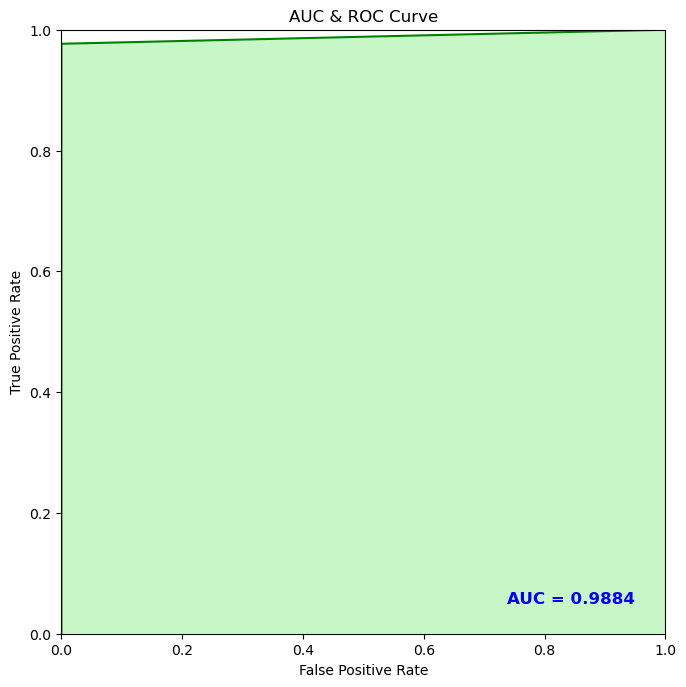

In [10]:
# AUC and ROC
import matplotlib.pyplot as plt
from sklearn import metrics
auc = metrics.roc_auc_score(ytest, predictions)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(ytest, predictions)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.5)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()